In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

## üìã ÎØ∏ÏÖò 1: A/B ÌÖåÏä§Ìä∏ Ïã†Î¢∞Íµ¨Í∞Ñ Î∂ÑÏÑù üß™

### üéØ ÌïôÏäµ Î™©Ìëú

ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ Î™®Îì† Í∞úÎÖêÏùÑ Ï¢ÖÌï©ÌïòÏó¨ Ïã§Ï†ú ÎπÑÏ¶àÎãàÏä§ Î¨∏Ï†úÏóê Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

### üìñ Î∞∞Í≤Ω Ïä§ÌÜ†Î¶¨

Ïó¨Îü¨Î∂ÑÏùÄ Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞Ïùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞ÄÏûÖÎãàÎã§! üõí

- **Í∏∞Ï°¥ ÏõπÏÇ¨Ïù¥Ìä∏(A)**: ÌååÎûÄÏÉâ Íµ¨Îß§ Î≤ÑÌäº
- **ÏÉàÎ°úÏö¥ ÏõπÏÇ¨Ïù¥Ìä∏(B)**: Îπ®Í∞ÑÏÉâ Íµ¨Îß§ Î≤ÑÌäº

Í≤ΩÏòÅÏßÑÏù¥ Î¨ªÏäµÎãàÎã§: "Îπ®Í∞ÑÏÉâ Î≤ÑÌäºÏù¥ Ï†ïÎßê Îçî Ï¢ãÏùÄÍ∞ÄÏöî? ÌôïÏã§Ìïú Ï¶ùÍ±∞Í∞Ä ÏûàÎÇòÏöî?" üìä

In [3]:
# A/B ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
np.random.seed(404)

# AÍ∑∏Î£π (Í∏∞Ï°¥ ÎîîÏûêÏù∏): Ï†ÑÌôòÏú® 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a) # Ïù¥Ìï≠ Î∂ÑÌè¨Î°ú 0/1 Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ‚Üí 1ÏùÄ Íµ¨Îß§, 0ÏùÄ ÎØ∏Íµ¨Îß§

# BÍ∑∏Î£π (ÏÉà ÎîîÏûêÏù∏): Ï†ÑÌôòÏú® 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ab_test_data = pd.DataFrame({'group': ['A']*n_a + ['B']*n_b,'user_id': range(1, n_a + n_b + 1),'converted': np.concatenate([conversions_a, conversions_b])})

print("üß™ A/B ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")
print(f"AÍ∑∏Î£π ÏÇ¨Ïö©Ïûê Ïàò: {n_a}Î™Ö")
print(f"BÍ∑∏Î£π ÏÇ¨Ïö©Ïûê Ïàò: {n_b}Î™Ö")
print("\nÍ∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú®:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['total_users', 'converted_users', 'conversion_rate']
print(conversion_summary)

üß™ A/B ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
AÍ∑∏Î£π ÏÇ¨Ïö©Ïûê Ïàò: 500Î™Ö
BÍ∑∏Î£π ÏÇ¨Ïö©Ïûê Ïàò: 500Î™Ö

Í∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú®:
       total_users  converted_users  conversion_rate
group                                               
A              500               60            0.120
B              500               56            0.112


In [4]:
ab_test_data.head()

group  user_id  converted
0     A        1          0
1     A        2          0
2     A        3          1
3     A        4          0
4     A        5          0

In [5]:
conversion_summary.head()

total_users  converted_users  conversion_rate
group                                               
A              500               60            0.120
B              500               56            0.112

In [6]:
# ‚úÖ **Î¨∏Ï†ú 1-1: Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** AÍ∑∏Î£πÍ≥º BÍ∑∏Î£πÏùò Ï†ÑÌôòÏú®Í≥º ÌëúÏ§ÄÏò§Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.
p_a = conversion_summary.loc['A','conversion_rate']
se_a=np.sqrt(p_a * (1 - p_a) / n_a)

p_b = conversion_summary.loc['B', 'conversion_rate']
se_b= np.sqrt(p_b * (1 - p_b) / n_b)

print(f"AÍ∑∏Î£π Ï†ÑÌôòÏú®: {p_a:.3f} ¬± {se_a:.3f}")
print(f"BÍ∑∏Î£π Ï†ÑÌôòÏú®: {p_b:.3f} ¬± {se_b:.3f}")

AÍ∑∏Î£π Ï†ÑÌôòÏú®: 0.120 ¬± 0.015
BÍ∑∏Î£π Ï†ÑÌôòÏú®: 0.112 ¬± 0.014


‚úÖ **Ïù¥Ìï≠ Î∂ÑÌè¨Ïùò ÎπÑÏú®(Ï†ÑÌôòÏú®)**Ïóê ÎåÄÌïú **ÌëúÏ§ÄÏò§Ï∞®(Standard Error, SE)** Í≥µÏãù\
SE
= sqrt(
ùëù
(
1
‚àí
ùëù
)
/
ùëõ
)

ùëù
: ÌëúÎ≥∏ Ï†ÑÌôòÏú® (ÎπÑÏú®)

ùëõ
: ÌëúÎ≥∏ ÌÅ¨Í∏∞

In [7]:
# ‚úÖ **Î¨∏Ï†ú 1-2: AÍ∑∏Î£π Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** AÍ∑∏Î£πÏùò 95% Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.
# TODO: 95% Ïã†Î¢∞Íµ¨Í∞ÑÏö© zÍ∞í ÏÑ§Ï†ï
z_score = 1.96

# TODO: AÍ∑∏Î£π Ïã†Î¢∞Íµ¨Í∞Ñ ÏÉÅÌïòÌïú Í≥ÑÏÇ∞
ci_a_lower = p_a - z_score * se_a
ci_a_upper = p_a + z_score * se_a

print(f"AÍ∑∏Î£π 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")

AÍ∑∏Î£π 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [0.092, 0.148]


In [8]:
# ‚úÖ **Î¨∏Ï†ú 1-3: BÍ∑∏Î£π Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** BÍ∑∏Î£πÏùò 95% Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.

# TODO: BÍ∑∏Î£π Ïã†Î¢∞Íµ¨Í∞Ñ ÏÉÅÌïòÌïú Í≥ÑÏÇ∞
ci_b_lower = p_b - z_score * se_b
ci_b_upper = p_b + z_score* se_b

print(f"BÍ∑∏Î£π 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")

BÍ∑∏Î£π 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [0.084, 0.140]


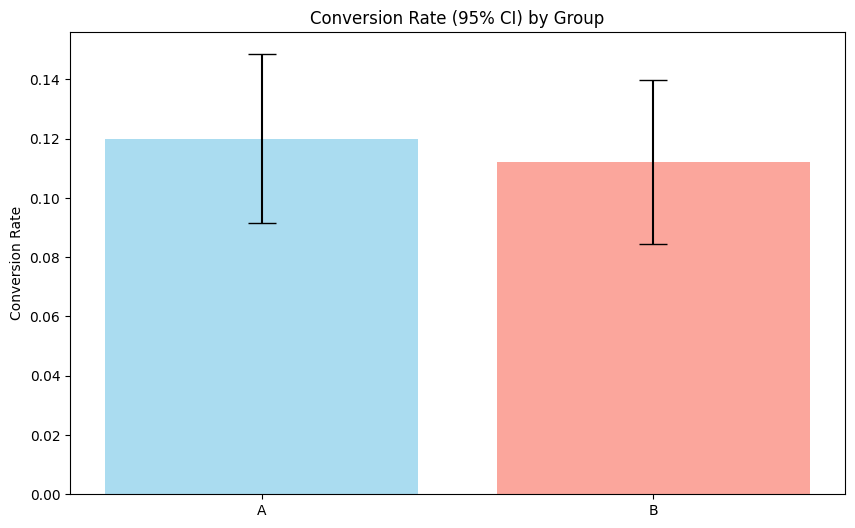

In [9]:
# ‚úÖ **Î¨∏Ï†ú 1-4: Í∑∏Î£πÎ≥Ñ Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôîÌïòÍ∏∞** üìä
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú Îëê Í∑∏Î£πÏùò Ï†ÑÌôòÏú®Í≥º Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í∑∏Î†§Î≥¥ÏÑ∏Ïöî.
plt.figure(figsize=(10, 6))

# TODO: Í∑∏Î£πÎ™ÖÍ≥º Ï†ÑÌôòÏú® Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
groups = ['A', 'B']
rates =  [p_a, p_b]

# TODO: Ïò§Ï∞®ÎßâÎåÄ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞ (z_score * ÌëúÏ§ÄÏò§Ï∞®)
errors = [z_score * se_a, z_score * se_b]

# TODO: ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.bar(groups,rates, yerr=errors, width=0.8, capsize=10, alpha=0.7, color=['skyblue', 'salmon'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate (95% CI) by Group')
plt.show()

In [10]:
### ‚úÖ **Î¨∏Ï†ú 1-5: Ï†ÑÌôòÏú® Ï∞®Ïù¥ Í≥ÑÏÇ∞ÌïòÍ∏∞** üìä
# **ü§î Ìï¥ÏïºÌï† Ïùº:** BÍ∑∏Î£πÏù¥ AÍ∑∏Î£πÎ≥¥Îã§ ÏñºÎßàÎÇò Îçî Ï¢ãÏùÄÏßÄ Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.

# TODO: Ï†ÑÌôòÏú® Ï∞®Ïù¥ Í≥ÑÏÇ∞ (B - A)
diff = p_b - p_a

# TODO: Ï∞®Ïù¥Ïùò ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞
# ÌûåÌä∏: Îëê ÎèÖÎ¶Ω ÎπÑÏú® Ï∞®Ïù¥Ïùò ÌëúÏ§ÄÏò§Ï∞®Îäî sqrt(se_a^2 + se_b^2)
se_diff = np.sqrt(se_a**2 + se_b**2)

print(f"Ï†ÑÌôòÏú® Ï∞®Ïù¥ (B-A): {diff:.3f}")
print(f"Ï∞®Ïù¥Ïùò ÌëúÏ§ÄÏò§Ï∞®: {se_diff:.3f}")

Ï†ÑÌôòÏú® Ï∞®Ïù¥ (B-A): -0.008
Ï∞®Ïù¥Ïùò ÌëúÏ§ÄÏò§Ï∞®: 0.020


In [11]:
### ‚úÖ **Î¨∏Ï†ú 1-6: Ï∞®Ïù¥Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ï†ÑÌôòÏú® Ï∞®Ïù¥Ïùò 95% Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.

# TODO: Ï∞®Ïù¥Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ ÏÉÅÌïòÌïú Í≥ÑÏÇ∞
ci_diff_lower = diff - 1.96 * se_diff
ci_diff_upper = diff + 1.96 * se_diff

print(f"Ï†ÑÌôòÏú® Ï∞®Ïù¥Ïùò 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

# TODO: 0Ïù¥ Ìè¨Ìï®ÎêòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
if ci_diff_lower > 0:
    print("üéâ BÍ∞Ä AÎ≥¥Îã§ ÌôïÏã§Ìûà Ï¢ãÏäµÎãàÎã§!")
elif ci_diff_upper < 0:
    print("üò¢ AÍ∞Ä BÎ≥¥Îã§ ÌôïÏã§Ìûà Ï¢ãÏäµÎãàÎã§.")
else:
    print("ü§î ÌôïÏã§ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

Ï†ÑÌôòÏú® Ï∞®Ïù¥Ïùò 95% Ïã†Î¢∞Íµ¨Í∞Ñ: [-0.048, 0.032]
ü§î ÌôïÏã§ÌïòÏßÄ ÏïäÏäµÎãàÎã§.


"Ïö∞Î¶¨Îäî Îëê ÏßëÎã®Ïùò **Ï†ÑÌôòÏú® Ï∞®Ïù¥Ïùò ÏßÑÏßú Í∞í(Î™®Ïàò)**Í∞Ä
‚Äì4.8%ÏóêÏÑú +3.2% ÏÇ¨Ïù¥Ïóê ÏûàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† 95% ÌôïÏã†ÌïúÎã§."

In [12]:
### ‚úÖ **Î¨∏Ï†ú 1-7: Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú ÏûëÏÑ±ÌïòÍ∏∞** üíº
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨Ìï¥ÏÑú Î≥¥Í≥†ÏÑúÎ•º ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî.


In [13]:
# TODO: Î≥¥Í≥†ÏÑú ÏôÑÏÑ±ÌïòÍ∏∞
print("üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú")
print("="*50)
print(f"üîç Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"   ‚Ä¢ AÍ∑∏Î£π Ï†ÑÌôòÏú®: {p_a:.1%}")
print(f"   ‚Ä¢ BÍ∑∏Î£π Ï†ÑÌôòÏú®: {p_b:.1%}")
print(f"   ‚Ä¢ Í∞úÏÑ† Ìö®Í≥º: {diff:.1%}p")
print()
print(f"üìä ÌÜµÍ≥ÑÏ†Å Ïã†Î¢∞ÎèÑ:")
print(f"   ‚Ä¢ Í∞úÏÑ† Ìö®Í≥º Î≤îÏúÑ: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("üí° ÏùòÏÇ¨Í≤∞Ï†ï:")

# TODO: ifÎ¨∏ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Í∂åÏû•ÏÇ¨Ìï≠ ÏûëÏÑ±ÌïòÍ∏∞
# ÌûåÌä∏: ci_diff_lower > 0Ïù¥Î©¥ ÏÉà ÎîîÏûêÏù∏ ÎèÑÏûÖ Í∂åÏû•
if ci_diff_lower > 0:
    print("   ‚úÖ ÏÉà ÎîîÏûêÏù∏(B) ÎèÑÏûÖÏùÑ Í∂åÏû•Ìï©ÎãàÎã§!")
else:
    print("   ‚ùå Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú
üîç Î∂ÑÏÑù Í≤∞Í≥º:
   ‚Ä¢ AÍ∑∏Î£π Ï†ÑÌôòÏú®: 12.0%
   ‚Ä¢ BÍ∑∏Î£π Ï†ÑÌôòÏú®: 11.2%
   ‚Ä¢ Í∞úÏÑ† Ìö®Í≥º: -0.8%p

üìä ÌÜµÍ≥ÑÏ†Å Ïã†Î¢∞ÎèÑ:
   ‚Ä¢ Í∞úÏÑ† Ìö®Í≥º Î≤îÏúÑ: -4.8%p ~ 3.2%p

üí° ÏùòÏÇ¨Í≤∞Ï†ï:
   ‚ùå Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.


##[Ïã†Í∑ú ÏõπÏÇ¨Ïù¥Ìä∏ Íµ¨Îß§Î≤ÑÌäº ÎîîÏûêÏù∏ Î≥ÄÍ≤ΩÏùò Ïú†Ìö®ÏÑ± Î≥¥Í≥†ÏÑú]##
1. ÌèâÍ∞Ä Î∞©Î≤ï: Ïã†Í∑ú ÏõπÏÇ¨Ïù¥Ìä∏ Íµ¨Îß§Î≤ÑÌäº(Îπ®Í∞ÑÏÉâ)Ïù¥ Í∏∞Ï°¥ ÏõπÏÇ¨Ïù¥Ìä∏(ÌååÎûÄÏÉâ) ÎåÄÎπÑ ÎÜíÏùÄ Ï†ÑÌôòÏú®ÏùÑ Ïú†ÎèÑ ÌïòÎäîÏßÄ Í≤ÄÏ¶ù

2. Ï£ºÏöî Í≤∞Í≥º:

|Íµ¨Î∂Ñ                 | Group A(Í∏∞Ï°¥)               | Group B(Ïã†Í∑ú) |
| ------------------------ | ---------------------- | ------- |
|ÏÉòÌîå ÌÅ¨Í∏∞              | 500                    | 500     |
|Ïã§Ï†ú Í¥ÄÏ∏°Îêú Ï†ÑÌôòÏú® | 12.0%                  | 11.2%   |
|Ï†ÑÌôòÏú® Ï∞®Ïù¥      | ‚Äì0.8 percentage points |         |
|95% Ïã†Î¢∞Íµ¨Í∞Ñ  | (‚Äì4.8%, +3.2%)         |         |

3. ÌèâÍ∞Ä

  1) Í∑∏Î£π BÏóêÏÑú Îçî ÎÜíÏùÄ Ï†ÑÌôòÏú®ÏùÑ Í∏∞ÎåÄÌñàÏßÄÎßå (ÏÑ§Ï†ïÍ∞í: 15% vs 12%), Ïã§Ï†ú Í¥ÄÏ∏°Îêú Ï†ÑÌôòÏú®ÏùÄ A Í∑∏Î£πÏù¥ Îçî ÎÜíÍ≤å ÎÇòÌÉÄÎÇ® (A: 12.0%, B: 11.2%).

  2) Ï†ÑÌôòÏú® Ï∞®Ïù¥Ïóê ÎåÄÌïú 95% Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ ‚Äì4.8%ÏóêÏÑú +3.2%ÍπåÏßÄÎ°ú ÎÇòÌÉÄÎÇòÎ©∞, 0ÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÏùå.

  3) Îî∞ÎùºÏÑú B Í∑∏Î£πÏù¥ A Í∑∏Î£πÎ≥¥Îã§ Ï†ÑÌôòÏú®Ïù¥ Ïö∞ÏàòÌïòÎã§Í≥† ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í≤∞Î°†ÎÇ¥Î¶¥ Ïàò ÏóÜÏùå.
Ïò§ÌûàÎ†§ BÍ∞Ä Îçî ÎÇÆÏùÄ ÏÑ±Í≥ºÎ•º Î≥¥ÏòÄÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏùå.

4. Í≤∞Î°†
  - Ïã†Í∑ú ÏõπÏÇ¨Ïù¥Ìä∏Ïùò Îπ®Í∞ÑÏÉâ Î≤ÑÌäº(Í∑∏Î£π B)Ïù¥ Í∏∞Ï°¥ ÌååÎûÄÏÉâ Î≤ÑÌäº(Í∑∏Î£π A)Î≥¥Îã§ Ï†ÑÌôòÏú® Ï∏°Î©¥ÏóêÏÑú Îçî Ïö∞ÏàòÌïòÎã§Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Í∑ºÍ±∞Îäî ÏóÜÏùå.
  - Ï†ïÏãù Ï†ÅÏö© Ï†Ñ, Îçî ÎßéÏùÄ ÏÉòÌîåÏùÑ ÌôúÏö©Ìïú Ïû¨ÌÖåÏä§Ìä∏ ÎòêÎäî ÎîîÏûêÏù∏ Í∞úÏÑ† Í∂åÏû•

## üìã ÎØ∏ÏÖò 2: Ïó∞Î†πÎåÄÎ≥Ñ Íµ¨Îß§ Î∂ÑÏÑù (t-Í≤ÄÏ†ï ÎßàÏä§ÌÑ∞ÌïòÍ∏∞!) üë•

### üéØ ÌïôÏäµ Î™©Ìëú

t-Í≤ÄÏ†ïÏùò Îã§ÏñëÌïú Ï¢ÖÎ•òÎ•º Ïã§Ï†ÑÏóêÏÑú ÏôÑÎ≤ΩÌïòÍ≤å ÌôúÏö©ÌïòÍ∏∞

### üìñ Î∞∞Í≤Ω Ïä§ÌÜ†Î¶¨

Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú "Ïó∞Î†πÎåÄÏóê Îî∞Îùº Íµ¨Îß§ Ìå®ÌÑ¥Ïù¥ Îã§Î•ºÍπå?" ÌïòÎäî Í∂ÅÍ∏àÏ¶ùÏù¥ ÏÉùÍ≤ºÏäµÎãàÎã§.

In [14]:
# Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞Ïùò Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞
np.random.seed(789)
ages = np.random.randint(20, 60, 100)
purchase_amounts = 50 + 2*ages + np.random.normal(0, 20, 100)

print("üìä Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(f"Ïó∞Î†π Î≤îÏúÑ: {ages.min()}ÏÑ∏ ~ {ages.max()}ÏÑ∏")
print(f"Íµ¨Îß§Í∏àÏï° Î≤îÏúÑ: {purchase_amounts.min():.0f}Îßå Ïõê ~ {purchase_amounts.max():.0f}Îßå Ïõê")
print(f"ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°: {purchase_amounts.mean():.1f}Îßå Ïõê")

üìä Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
Ïó∞Î†π Î≤îÏúÑ: 20ÏÑ∏ ~ 59ÏÑ∏
Íµ¨Îß§Í∏àÏï° Î≤îÏúÑ: 39Îßå Ïõê ~ 208Îßå Ïõê
ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°: 130.1Îßå Ïõê


In [15]:
### ‚úÖ **Î¨∏Ï†ú 2-1: Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÏùºÌëúÎ≥∏ t-Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.

# TODO: ÌëúÎ≥∏ ÌèâÍ∑† Í≥ÑÏÇ∞
sample_mean = purchase_amounts.mean()

# TODO: ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
sample_std = purchase_amounts.std(ddof=1)

# TODO: ÌëúÎ≥∏ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
n = len(purchase_amounts)

# TODO: ÎπÑÍµêÌï† Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (ÏóÖÍ≥Ñ Í∏∞Ï§Ä 150ÎßåÏõê)
standard_value = 150

print(f"ÌëúÎ≥∏ ÌèâÍ∑†: {sample_mean:.2f}Îßå Ïõê")
print(f"ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞®: {sample_std:.2f}Îßå Ïõê")
print(f"ÌëúÎ≥∏ ÌÅ¨Í∏∞: {n}Î™Ö")
print(f"ÎπÑÍµê Í∏∞Ï§ÄÍ∞í: {standard_value}Îßå Ïõê")

ÌëúÎ≥∏ ÌèâÍ∑†: 130.09Îßå Ïõê
ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞®: 33.90Îßå Ïõê
ÌëúÎ≥∏ ÌÅ¨Í∏∞: 100Î™Ö
ÎπÑÍµê Í∏∞Ï§ÄÍ∞í: 150Îßå Ïõê


In [16]:
### ‚úÖ **Î¨∏Ï†ú 2-2: t-ÌÜµÍ≥ÑÎüâ ÏßÅÏ†ë Í≥ÑÏÇ∞ÌïòÍ∏∞** üßÆ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** t-Í≤ÄÏ†ïÏùò tÍ∞íÏùÑ ÏßÅÏ†ë Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.

# TODO: t-ÌÜµÍ≥ÑÎüâ Í≥µÏãù ÏÇ¨Ïö©ÌïòÍ∏∞
# ÌûåÌä∏: t = (ÌëúÎ≥∏ÌèâÍ∑† - Í∏∞Ï§ÄÍ∞í) / (ÌëúÏ§ÄÌé∏Ï∞® / sqrt(n))
t_stat = (sample_mean - standard_value) / (sample_std/np.sqrt(n))


print(f"ÏßÅÏ†ë Í≥ÑÏÇ∞Ìïú t-ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}")

ÏßÅÏ†ë Í≥ÑÏÇ∞Ìïú t-ÌÜµÍ≥ÑÎüâ: -5.874


In [17]:
# ÎπÑÍµêÎ•º ÏúÑÌï¥ scipyÎ°úÎèÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Í∏∞
from scipy.stats import ttest_1samp
t_stat_scipy, p_value = ttest_1samp(purchase_amounts, standard_value)

print(f"scipyÎ°ú Í≥ÑÏÇ∞Ìïú t-ÌÜµÍ≥ÑÎüâ: {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.4f}")

scipyÎ°ú Í≥ÑÏÇ∞Ìïú t-ÌÜµÍ≥ÑÎüâ: -5.874
p-value: 0.0000


In [18]:
### ‚úÖ **Î¨∏Ï†ú 2-3: Í≤∞Í≥º Ìï¥ÏÑùÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** p-valueÎ•º Î≥¥Í≥† Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï¥Î≥¥ÏÑ∏Ïöî.
# TODO: Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
alpha = 0.05

print("üéØ Í≤∞Í≥º Ìï¥ÏÑù")
print("-"*50)
print(f"Í∑ÄÎ¨¥Í∞ÄÏÑ§: Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï° = {standard_value}Îßå Ïõê\nÎåÄÎ¶ΩÍ∞ÄÏÑ§: Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï° ‚â† {standard_value}Îßå Ïõê")
print("\n")
# TODO: p-valueÏôÄ alpha ÎπÑÍµêÌïòÍ∏∞
if p_value < alpha:
   print(f"‚úÖ p-value ({p_value:.4f}) < Œ± ({alpha})")
   print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å! ÏóÖÍ≥Ñ Í∏∞Ï§ÄÍ≥º Ïú†ÏùòÌïòÍ≤å Îã§Î¶ÖÎãàÎã§.")

  # TODO: ÌèâÍ∑†Ïù¥ Îçî ÌÅ∞ÏßÄ ÏûëÏùÄÏßÄ ÌôïÏù∏ÌïòÍ∏∞
   if sample_mean > standard_value:
    print(f"‚Üí Ïö∞Î¶¨ Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°ÏùÄ {sample_mean:.0f}Îßå ÏõêÏúºÎ°ú, ÏóÖÍ≥Ñ ÌèâÍ∑†{standard_value}Îßå ÏõêÎ≥¥Îã§ Îçî ÎßéÏù¥ Íµ¨Îß§Ìï©ÎãàÎã§! üéâ")
   else:
    print(f"‚Üí Ïö∞Î¶¨ Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°ÏùÄ {sample_mean:.0f}Îßå ÏõêÏúºÎ°ú, ÏóÖÍ≥Ñ ÌèâÍ∑†{standard_value}Îßå ÏõêÎ≥¥Îã§ Ï†ÅÍ≤å Íµ¨Îß§Ìï©ÎãàÎã§. üòÖ")
else:
  print(f"‚ùå p-value ({p_value:.4f}) ‚â• Œ± ({alpha})")
  print("‚Üí ÏóÖÍ≥Ñ Í∏∞Ï§ÄÍ≥º Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.")

üéØ Í≤∞Í≥º Ìï¥ÏÑù
--------------------------------------------------
Í∑ÄÎ¨¥Í∞ÄÏÑ§: Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï° = 150Îßå Ïõê
ÎåÄÎ¶ΩÍ∞ÄÏÑ§: Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï° ‚â† 150Îßå Ïõê


‚úÖ p-value (0.0000) < Œ± (0.05)
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å! ÏóÖÍ≥Ñ Í∏∞Ï§ÄÍ≥º Ïú†ÏùòÌïòÍ≤å Îã§Î¶ÖÎãàÎã§.
‚Üí Ïö∞Î¶¨ Í≥†Í∞ùÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°ÏùÄ 130Îßå ÏõêÏúºÎ°ú, ÏóÖÍ≥Ñ ÌèâÍ∑†150Îßå ÏõêÎ≥¥Îã§ Ï†ÅÍ≤å Íµ¨Îß§Ìï©ÎãàÎã§. üòÖ


In [19]:
### ‚úÖ **Î¨∏Ï†ú 2-4: Ïó∞Î†πÎåÄÎ≥Ñ Í∑∏Î£π ÎÇòÎàÑÍ∏∞** üë•
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ïÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Îëê Í∑∏Î£πÏúºÎ°ú ÎÇòÎàÑÏÑ∏Ïöî.

# TODO: Ï†äÏùÄÏ∏µ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ (20-39ÏÑ∏)
young_mask = (ages >= 20) & (ages <= 39)  # Boolean mask : Ï°∞Í±¥Í∞íÏóê Ìï¥ÎãπÌïòÎ©¥ True
group1_purchases = purchase_amounts[young_mask]  # "young_maskÍ∞Ä TrueÏù∏ ÏúÑÏπòÏùò Íµ¨Îß§Í∏àÏï°Îßå ÎΩëÏïÑÎùº"

# TODO: Ï§ëÎÖÑÏ∏µ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ (40-59ÏÑ∏)
middle_mask = (ages >= 40) & (ages <= 59)
group2_purchases = purchase_amounts[middle_mask]

print("üë• Í∑∏Î£π ÎÇòÎàÑÍ∏∞ Í≤∞Í≥º")
print(f"Ï†äÏùÄÏ∏µ (20-39ÏÑ∏): {len(group1_purchases)}Î™Ö")
print(f"Ï§ëÎÖÑÏ∏µ (40-59ÏÑ∏): {len(group2_purchases)}Î™Ö")

üë• Í∑∏Î£π ÎÇòÎàÑÍ∏∞ Í≤∞Í≥º
Ï†äÏùÄÏ∏µ (20-39ÏÑ∏): 47Î™Ö
Ï§ëÎÖÑÏ∏µ (40-59ÏÑ∏): 53Î™Ö


In [20]:
### ‚úÖ **Î¨∏Ï†ú 2-5: Í∑∏Î£πÎ≥Ñ Í∏∞Ïà†ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ÌïòÍ∏∞** üìä
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Í∞Å Í∑∏Î£πÏùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî.
group1_mean = group1_purchases.mean()
group2_mean = group2_purchases.mean()
group1_std = group1_purchases.std(ddof=1)
group2_std = group2_purchases.std(ddof=1)

print("üìä Í∑∏Î£πÎ≥Ñ Í∏∞Ïà†ÌÜµÍ≥Ñ")
print(f"Ï†äÏùÄÏ∏µ ÌèâÍ∑†: {group1_mean:.1f}Îßå Ïõê (ÌëúÏ§ÄÌé∏Ï∞®: {group1_std:.1f})")
print(f"Ï§ëÎÖÑÏ∏µ ÌèâÍ∑†: {group2_mean:.1f}Îßå Ïõê (ÌëúÏ§ÄÌé∏Ï∞®: {group2_std:.1f})")

# TODO: ÌèâÍ∑† Ï∞®Ïù¥ Í≥ÑÏÇ∞
diff = group2_mean - group1_mean
print(f"ÌèâÍ∑† Ï∞®Ïù¥: {diff:.1f}Îßå Ïõê")

üìä Í∑∏Î£πÎ≥Ñ Í∏∞Ïà†ÌÜµÍ≥Ñ
Ï†äÏùÄÏ∏µ ÌèâÍ∑†: 106.4Îßå Ïõê (ÌëúÏ§ÄÌé∏Ï∞®: 25.2)
Ï§ëÎÖÑÏ∏µ ÌèâÍ∑†: 151.1Îßå Ïõê (ÌëúÏ§ÄÌé∏Ï∞®: 25.9)
ÌèâÍ∑† Ï∞®Ïù¥: 44.6Îßå Ïõê


In [21]:
### ‚úÖ **Î¨∏Ï†ú 2-6: ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ï Ïã§ÌñâÌïòÍ∏∞** üß™
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Îëê Í∑∏Î£π Í∞ÑÏùò Ï∞®Ïù¥Î•º t-Í≤ÄÏ†ïÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî. (tÍ≤ÄÏ†ï -> Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ïò≥ÏïòÏùÑ ÎïåÏùò Î∂ÑÌè¨, Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïúÏßÄÎ•º Í≤ÄÏ†ï)

# TODO: ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ï Ïã§Ìñâ
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group1_purchases, group2_purchases)

print("üßÆ t-Í≤ÄÏ†ï Í≤∞Í≥º")
print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")


üßÆ t-Í≤ÄÏ†ï Í≤∞Í≥º
t-ÌÜµÍ≥ÑÎüâ: -8.709
p-value: 0.0000


In [22]:
# TODO: Í≤∞Í≥º Ìï¥ÏÑùÌïòÍ∏∞
alpha = 0.05
print("üéØ ÎπÑÏ¶àÎãàÏä§ Ìï¥ÏÑù")
print("-"*50)
print("Í∑ÄÎ¨¥Í∞ÄÏÑ§: Ï†äÏùÄÏ∏µÍ≥º Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°Ïù¥ Í∞ôÎã§.\nÎåÄÎ¶ΩÍ∞ÄÏÑ§: Ï†äÏùÄÏ∏µÍ≥º Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°Ïù¥ Í∞ôÏßÄ ÏïäÎã§.")
print("\n")
if  p_value < alpha:
    print(f"‚úÖ Îëê Í∑∏Î£πÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§!(p= {p_value:.4f})")

    if group2_mean > group1_mean:
        print(f"‚Üí Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°ÏùÄ {group2_mean:.0f}Îßå ÏõêÏúºÎ°ú, Ï†äÏùÄÏ∏µÎ≥¥Îã§(ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°: {group1_mean:.0f}Îßå Ïõê) Îçî ÎßéÏù¥ Íµ¨Îß§Ìï©ÎãàÎã§!")
    else:
        print(f"‚Üí Ï†äÏùÄÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°ÏùÄ {group1_mean:.0f}Îßå ÏõêÏúºÎ°ú, Ï§ëÎÖÑÏ∏µ(ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°: {group2_mean:.0f}Îßå Ïõê)Î≥¥Îã§ Îçî ÎßéÏù¥ Íµ¨Îß§Ìï©ÎãàÎã§!")
else:
    print(f"‚ùå ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.(p= {p_value:.4f})")


üéØ ÎπÑÏ¶àÎãàÏä§ Ìï¥ÏÑù
--------------------------------------------------
Í∑ÄÎ¨¥Í∞ÄÏÑ§: Ï†äÏùÄÏ∏µÍ≥º Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°Ïù¥ Í∞ôÎã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§: Ï†äÏùÄÏ∏µÍ≥º Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°Ïù¥ Í∞ôÏßÄ ÏïäÎã§.


‚úÖ Îëê Í∑∏Î£πÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§!(p= 0.0000)
‚Üí Ï§ëÎÖÑÏ∏µÏùò ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°ÏùÄ 151Îßå ÏõêÏúºÎ°ú, Ï†äÏùÄÏ∏µÎ≥¥Îã§(ÌèâÍ∑† Íµ¨Îß§Í∏àÏï°: 106Îßå Ïõê) Îçî ÎßéÏù¥ Íµ¨Îß§Ìï©ÎãàÎã§!


In [23]:
### ‚úÖ **Î¨∏Ï†ú 2-7: Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ïÌïòÍ∏∞** üîç
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.

from scipy.stats import levene

# TODO: Î∂ÑÏÇ∞ ÏßÅÏ†ë ÎπÑÍµêÌïòÍ∏∞
var1 = group1_purchases.var(ddof=1)
var2 = group2_purchases.var(ddof=1)

print("üìä Î∂ÑÏÇ∞ ÎπÑÍµê")
print(f"Ï†äÏùÄÏ∏µ Î∂ÑÏÇ∞: {var1:.1f}")
print(f"Ï§ëÎÖÑÏ∏µ Î∂ÑÏÇ∞: {var2:.1f}")

üìä Î∂ÑÏÇ∞ ÎπÑÍµê
Ï†äÏùÄÏ∏µ Î∂ÑÏÇ∞: 637.1
Ï§ëÎÖÑÏ∏µ Î∂ÑÏÇ∞: 669.5


In [24]:
# TODO: Levene Í≤ÄÏ†ï Ïã§ÌñâÌïòÍ∏∞
levene_stat, levene_p = levene(group1_purchases, group2_purchases)

print("üß™ Levene Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï")
print(f"p-value: {levene_p:.4f}")
print("\n")
# TODO: Îì±Î∂ÑÏÇ∞ÏÑ± ÌåêÎã®ÌïòÍ∏∞
print("Í∑ÄÎ¨¥Í∞ÄÏÑ§: Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§.\nÎåÄÎ¶ΩÍ∞ÄÏÑ§: Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏßÄ ÏïäÎã§.")
print("\n")
if levene_p >= 0.05:
    print(f"‚úÖ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§ -> Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï ÎßåÏ°±(p={levene_p:.4f})")
else:
    print("‚ùå Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞ÅÌïúÎã§ -> Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï ÏúÑÎ∞∞p={levene_p:.4f})")

üß™ Levene Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
p-value: 0.8106


Í∑ÄÎ¨¥Í∞ÄÏÑ§: Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§: Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏßÄ ÏïäÎã§.


‚úÖ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§ -> Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï ÎßåÏ°±(p=0.8106)


## üìã ÎØ∏ÏÖò 3: ÏßÅÏõê ÎßåÏ°±ÎèÑ Ï¢ÖÌï© Î∂ÑÏÑù üè¢

### üéØ ÌïôÏäµ Î™©Ìëú

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ, ÌöåÍ∑ÄÎ∂ÑÏÑù, Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º Ïã§Ï†ÑÏóêÏÑú Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÌôúÏö©ÌïòÍ∏∞

In [25]:
# ÏßÅÏõê ÎßåÏ°±ÎèÑ Ï¢ÖÌï© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
np.random.seed(2024)
n = 250

data_hr = {
    'salary': np.random.lognormal(np.log(50000), 0.3, n),
    'years_at_company': np.random.exponential(3, n),
    'department': np.random.choice(['sales', 'dev', 'marketing', 'hr'], n, p=[0.3, 0.4, 0.2, 0.1]),
    'training_hours': np.random.gamma(2, 10, n),
    'position': np.random.choice(['staff', 'assistant', 'manager', 'director'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# ÎßåÏ°±ÎèÑ Ï†êÏàò (1-10Ï†ê) ÏÉùÏÑ±
satisfaction_base = (
    df_hr['salary']/10000 * 0.8 +
    df_hr['years_at_company'] * 0.3 +
    df_hr['training_hours'] * 0.1
)

dept_effect = df_hr['department'].map({'sales': -0.5, 'dev': 0.8, 'marketing': 0.3, 'hr': 0.0})
rank_effect = df_hr['position'].map({'staff': 0, 'assistant': 0.5, 'manager': 1.0, 'director': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

In [26]:
df_hr.head()

salary  years_at_company department  training_hours   position
0  82470.215328          5.843045        dev        4.431883    manager
1  62378.915363          1.803688        dev        1.373603  assistant
2  47066.508609          0.211051  marketing       17.196300    manager
3  47786.798588          4.785220        dev       49.198119    manager
4  65814.392648          2.060981      sales       18.363062      staff

In [27]:
satisfaction_base.head()

0     8.793719
1     5.668780
2     5.548266
3    10.178322
4     7.719752
dtype: float64

In [28]:
dept_effect.head()

0    0.8
1    0.8
2    0.3
3    0.8
4   -0.5
Name: department, dtype: float64

In [29]:
rank_effect.head()

0    1.0
1    0.5
2    1.0
3    1.0
4    0.0
Name: position, dtype: float64

In [30]:
# Ïù¥ÏßÅ ÏùòÌñ•
turnover_prob = 1 / (1 + np.exp(satisfaction - 5))
turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['satisfaction'] = satisfaction.round(1)
df_hr['turnover_intent'] = turnover_intent

print("üìä ÏßÅÏõê ÎßåÏ°±ÎèÑ Îç∞Ïù¥ÌÑ∞ (Ï≤òÏùå 5Í∞ú Ìñâ)")
print(df_hr.head())

üìä ÏßÅÏõê ÎßåÏ°±ÎèÑ Îç∞Ïù¥ÌÑ∞ (Ï≤òÏùå 5Í∞ú Ìñâ)
         salary  years_at_company department  training_hours   position  \
0  82470.215328          5.843045        dev        4.431883    manager   
1  62378.915363          1.803688        dev        1.373603  assistant   
2  47066.508609          0.211051  marketing       17.196300    manager   
3  47786.798588          4.785220        dev       49.198119    manager   
4  65814.392648          2.060981      sales       18.363062      staff   

   satisfaction  turnover_intent  
0          10.0                0  
1           8.2                0  
2           7.6                0  
3          10.0                0  
4           9.1                0  


In [31]:
### ‚úÖ **Î¨∏Ï†ú 3-1: ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ ÎßåÎì§Í∏∞** üîç
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ïà´ÏûêÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.
df_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            250 non-null    float64
 1   years_at_company  250 non-null    float64
 2   department        250 non-null    object 
 3   training_hours    250 non-null    float64
 4   position          250 non-null    object 
 5   satisfaction      250 non-null    float64
 6   turnover_intent   250 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 13.8+ KB


In [32]:
# TODO: Ïà´ÏûêÌòï Î≥ÄÏàòÎì§Îßå ÏÑ†Î≥ÑÌïòÍ∏∞
numeric_cols = ['salary', 'years_at_company', 'training_hours', 'satisfaction', 'turnover_intent']
correlation_data = df_hr[numeric_cols]

# TODO: ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞ÌïòÍ∏∞
correlation_matrix = correlation_data.corr()

print("üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§")
print(correlation_matrix.round(3))

üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§
                  salary  years_at_company  training_hours  satisfaction  \
salary             1.000             0.101          -0.003         0.567   
years_at_company   0.101             1.000          -0.062         0.389   
training_hours    -0.003            -0.062           1.000         0.484   
satisfaction       0.567             0.389           0.484         1.000   
turnover_intent   -0.265            -0.130          -0.276        -0.534   

                  turnover_intent  
salary                     -0.265  
years_at_company           -0.130  
training_hours             -0.276  
satisfaction               -0.534  
turnover_intent             1.000  


In [33]:
### ‚úÖ **Î¨∏Ï†ú 3-2: ÎßåÏ°±ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä ÎßåÏ°±ÎèÑÏôÄ Í∞ÄÏû• Í¥ÄÎ†®Ïù¥ ÎÜíÏùÄÏßÄ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî.

# TODO: ÎßåÏ°±ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå Ï∂îÏ∂úÌïòÍ∏∞
satisfaction_corr = correlation_matrix['satisfaction'].sort_values(ascending=False)

print("üéØ ÎßåÏ°±ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÎÜíÏùÄ Ïàú)")

# TODO: forÎ¨∏ÏúºÎ°ú Í∞Å Î≥ÄÏàòÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∂úÎ†•ÌïòÍ∏∞
for var, corr in satisfaction_corr.items():
    if var != 'satisfaction':  # ÎßåÏ°±ÎèÑ ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏
        # TODO: ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ ÌåêÎã®ÌïòÍ∏∞
        if abs(corr) > 0.5:
            strength = "strong"
        elif abs(corr) > 0.3:
            strength = "moderate"
        else:
            strength = "weak"

        direction = "positive" if corr > 0 else "negative"
        print(f"‚Ä¢ {var}: {corr:.3f} ({strength} {direction} correlation)")


üéØ ÎßåÏ°±ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÎÜíÏùÄ Ïàú)
‚Ä¢ salary: 0.567 (strong positive correlation)
‚Ä¢ training_hours: 0.484 (moderate positive correlation)
‚Ä¢ years_at_company: 0.389 (moderate positive correlation)
‚Ä¢ turnover_intent: -0.534 (strong negative correlation)


In [83]:
satisfaction_corr

satisfaction        1.000000
salary              0.566789
training_hours      0.484434
years_at_company    0.388998
turnover_intent    -0.533701
Name: satisfaction, dtype: float64

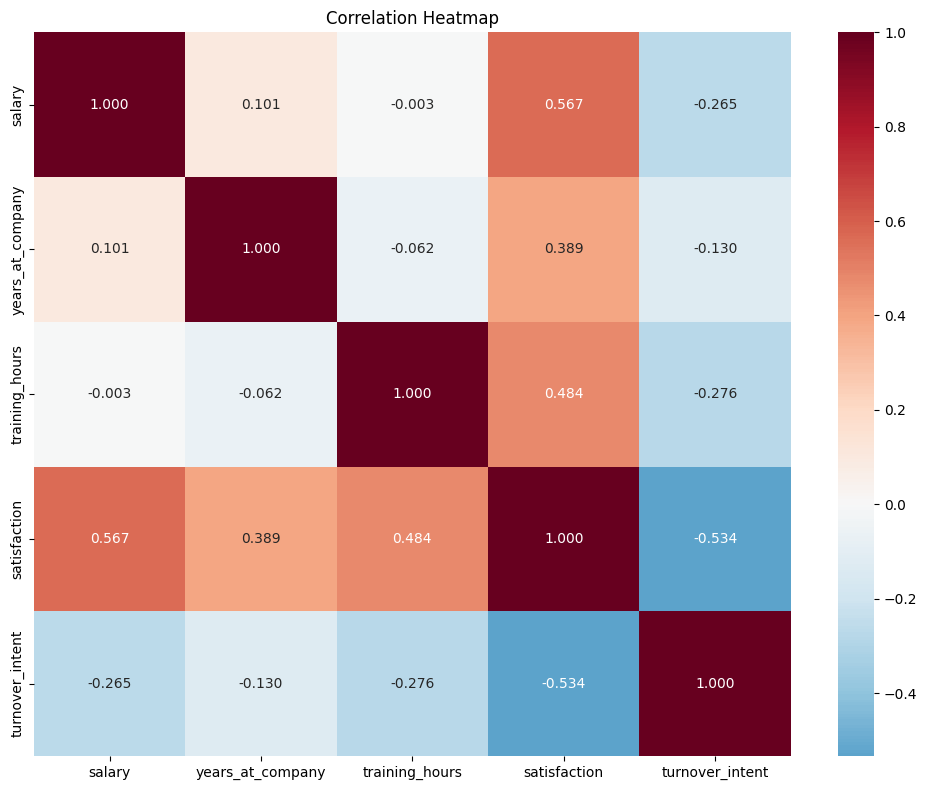

In [34]:
### ‚úÖ **Î¨∏Ï†ú 3-3: ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞** üìà
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌëúÌòÑÌï¥Î≥¥ÏÑ∏Ïöî.

# TODO: ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 8))

# TODO: seaborn heatmap ÏÇ¨Ïö©ÌïòÍ∏∞
# ÌûåÌä∏: sns.heatmap(data, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')  # ÎπàÏπ∏ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()




In [35]:
### ‚úÖ **Î¨∏Ï†ú 3-4: Î∂ÄÏÑúÎ≥Ñ ÎßåÏ°±ÎèÑ ÎπÑÍµêÌïòÍ∏∞** üè¢
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Î∂ÄÏÑúÎ≥ÑÎ°ú ÎßåÏ°±ÎèÑÏôÄ Ïù¥ÏßÅÏùòÌñ•ÏùÑ ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî.

# TODO: Î∂ÄÏÑúÎ≥Ñ Í∑∏Î£πÌôîÌï¥ÏÑú ÌèâÍ∑† Í≥ÑÏÇ∞ÌïòÍ∏∞
dept_summary = df_hr.groupby('department')['satisfaction'].mean()
print("üè¢ Î∂ÄÏÑúÎ≥Ñ ÌèâÍ∑† ÎßåÏ°±ÎèÑ")
print(dept_summary.round(2))

# TODO: Î∂ÄÏÑúÎ≥Ñ Ïù¥ÏßÅÏùòÌñ•ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
dept_turnover = df_hr.groupby('department')['turnover_intent'].mean()
print("\nüè¢ Î∂ÄÏÑúÎ≥Ñ Ïù¥ÏßÅÏùòÌñ•")
print(dept_turnover.round(3))

üè¢ Î∂ÄÏÑúÎ≥Ñ ÌèâÍ∑† ÎßåÏ°±ÎèÑ
department
dev          7.76
hr           6.93
marketing    7.82
sales        6.96
Name: satisfaction, dtype: float64

üè¢ Î∂ÄÏÑúÎ≥Ñ Ïù¥ÏßÅÏùòÌñ•
department
dev          0.139
hr           0.278
marketing    0.208
sales        0.276
Name: turnover_intent, dtype: float64


In [36]:
# TODO: forÎ¨∏ÏúºÎ°ú Î∂ÄÏÑúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù Ï∂úÎ†•ÌïòÍ∏∞
print("\nüìã Î∂ÄÏÑúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù")
for dept in df_hr['department'].unique():
    # TODO: Ìï¥Îãπ Î∂ÄÏÑú Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÍ∏∞
    dept_data =  df_hr[df_hr['department'] == dept]

    satisfaction_avg = dept_data['satisfaction'].mean()
    turnover_avg = dept_data['turnover_intent'].mean()

    print(f"‚Ä¢ {dept} dept.: ÎßåÏ°±ÎèÑ {satisfaction_avg:.1f}Ï†ê, Ïù¥ÏßÅÏùòÌñ• {turnover_avg:.1%}")


üìã Î∂ÄÏÑúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
‚Ä¢ dev dept.: ÎßåÏ°±ÎèÑ 7.8Ï†ê, Ïù¥ÏßÅÏùòÌñ• 13.9%
‚Ä¢ marketing dept.: ÎßåÏ°±ÎèÑ 7.8Ï†ê, Ïù¥ÏßÅÏùòÌñ• 20.8%
‚Ä¢ sales dept.: ÎßåÏ°±ÎèÑ 7.0Ï†ê, Ïù¥ÏßÅÏùòÌñ• 27.6%
‚Ä¢ hr dept.: ÎßåÏ°±ÎèÑ 6.9Ï†ê, Ïù¥ÏßÅÏùòÌñ• 27.8%


In [37]:
### ‚úÖ **Î¨∏Ï†ú 3-5: ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±ÌïòÍ∏∞** üîß
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏúÑÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÎçîÎØ∏ Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî.

# TODO: Î∂ÄÏÑú/ÏßÅÍ∏â ÎçîÎØ∏ Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌïòÍ∏∞
dept_dummies = pd.get_dummies(df_hr['department'], prefix='dept')
rank_dummies = pd.get_dummies(df_hr['position'], prefix='position')

# TODO: Í∏∞Ï§Ä Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†úÍ±∞ÌïòÍ∏∞ (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄ)
dept_dummies = dept_dummies.drop('dept_hr', axis=1)
rank_dummies = rank_dummies.drop('position_assistant', axis=1)

print("ÏÉùÏÑ±Îêú ÎçîÎØ∏ Î≥ÄÏàòÎì§:")
print("department:", list(dept_dummies.columns))
print("position:", list(rank_dummies.columns))


ÏÉùÏÑ±Îêú ÎçîÎØ∏ Î≥ÄÏàòÎì§:
department: ['dept_dev', 'dept_marketing', 'dept_sales']
position: ['position_director', 'position_manager', 'position_staff']


In [38]:
### ‚úÖ **Î¨∏Ï†ú 3-6: ÌöåÍ∑ÄÎ∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞** üîß
# **ü§î Ìï¥ÏïºÌï† Ïùº:** ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Ï§ÄÎπÑÌïòÏÑ∏Ïöî.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: ÎèÖÎ¶ΩÎ≥ÄÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
X_vars = pd.concat([df_hr, dept_dummies, rank_dummies], axis=1)

# TODO: Ï¢ÖÏÜçÎ≥ÄÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
y_var = df_hr['satisfaction']
# ÌûåÌä∏: df_hr[['Ïó∞Î¥â', 'Í∑ºÎ¨¥Ïó∞Ïàò', 'ÍµêÏú°ÏãúÍ∞Ñ']]Í≥º ÎçîÎØ∏Î≥ÄÏàòÎì§ÏùÑ Ìï©ÏπòÏÑ∏Ïöî
X_vars =  X_vars.drop(columns=['satisfaction', 'turnover_intent', 'department', 'position'])

print("üîß ÌöåÍ∑ÄÎ∂ÑÏÑù Î≥ÄÏàò Íµ¨ÏÑ±")
print(f"ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàò: {len(X_vars.columns)}Í∞ú")
print(f"ÎèÖÎ¶ΩÎ≥ÄÏàò: {list(X_vars.columns)}")
print(f"Ï¢ÖÏÜçÎ≥ÄÏàò: satisfaction")


üîß ÌöåÍ∑ÄÎ∂ÑÏÑù Î≥ÄÏàò Íµ¨ÏÑ±
ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàò: 9Í∞ú
ÎèÖÎ¶ΩÎ≥ÄÏàò: ['salary', 'years_at_company', 'training_hours', 'dept_dev', 'dept_marketing', 'dept_sales', 'position_director', 'position_manager', 'position_staff']
Ï¢ÖÏÜçÎ≥ÄÏàò: satisfaction


In [39]:
### ‚úÖ **Î¨∏Ï†ú 3-7: ÌöåÍ∑ÄÎ∂ÑÏÑù Ïã§ÌñâÌïòÍ∏∞** üìä
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÌñâÌïòÍ≥† R¬≤ÏùÑ Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.

# TODO: ÌöåÍ∑ÄÎ™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµÌïòÍ∏∞
model = LinearRegression()
model.fit(X_vars, y_var)

LinearRegression()

In [40]:
# TODO: ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞ÌïòÍ∏∞
y_pred = model.predict(X_vars)

# TODO: R¬≤ Í≥ÑÏÇ∞ÌïòÍ∏∞
r2 = r2_score(y_var, y_pred)

print("üìä Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º")
print(f"R¬≤ (ÏÑ§Î™ÖÎ†•): {r2:.3f} ({r2*100:.1f}%)")


üìä Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º
R¬≤ (ÏÑ§Î™ÖÎ†•): 0.800 (80.0%)


In [41]:
### ‚úÖ **Î¨∏Ï†ú 3-8: ÌöåÍ∑ÄÍ≥ÑÏàò Ìï¥ÏÑùÌïòÍ∏∞** üîç
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä ÎßåÏ°±ÎèÑÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî.

# TODO: ÌöåÍ∑ÄÍ≥ÑÏàòÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ∏∞
coefficients = pd.DataFrame({
    'Î≥ÄÏàò':  X_vars.columns,
    'Í≥ÑÏàò':  model.coef_,
    'Ï†àÎåìÍ∞í': np.abs(model.coef_)
})

# TODO: Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
coefficients = coefficients.sort_values('Ï†àÎåìÍ∞í', ascending=False)

print("üîç ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù (ÏòÅÌñ•Î†• Ïàú)")
print(coefficients.head(5))  # ÏÉÅÏúÑ 5Í∞úÎßå Ï∂úÎ†•

# TODO: Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅ∞ Î≥ÄÏàò Ï∞æÍ∏∞
most_important = coefficients.iloc[0]
print(f"\nüí°Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅ∞ Î≥ÄÏàò: {most_important['Î≥ÄÏàò']} (Í≥ÑÏàò: {most_important['Í≥ÑÏàò']:.3f})")


üîç ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù (ÏòÅÌñ•Î†• Ïàú)
                  Î≥ÄÏàò        Í≥ÑÏàò       Ï†àÎåìÍ∞í
6  position_director  1.068096  1.068096
3           dept_dev  0.497000  0.497000
5         dept_sales -0.496424  0.496424
7   position_manager  0.438483  0.438483
8     position_staff -0.325535  0.325535

üí°Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅ∞ Î≥ÄÏàò: position_director (Í≥ÑÏàò: 1.068)


In [42]:
### ‚úÖ **Î¨∏Ï†ú 3-9: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞** üéØ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ïù¥ÏßÅ ÏùòÌñ•ÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º Ï§ÄÎπÑÌïòÏÑ∏Ïöî.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TODO: Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ïÌïòÍ∏∞
X_logistic =  X_vars
y_logistic = df_hr['turnover_intent']


# TODO: ÌòÑÏû¨ Ïù¥ÏßÅ ÏùòÌñ• ÌòÑÌô© ÌååÏïÖÌïòÍ∏∞
turnover_summary = df_hr['turnover_intent'].value_counts()
turnover_rate = df_hr['turnover_intent'].mean()


print("üìä ÌòÑÏû¨ Ïù¥ÏßÅ ÏùòÌñ• ÌòÑÌô©")
print(f"Ïù¥ÏßÅ ÏùòÌñ• ÏûàÏùå: {turnover_summary[1]}Î™Ö ({turnover_rate:.1%})")
print(f"Ïù¥ÏßÅ ÏùòÌñ• ÏóÜÏùå: {turnover_summary[0]}Î™Ö ({1-turnover_rate:.1%})")

üìä ÌòÑÏû¨ Ïù¥ÏßÅ ÏùòÌñ• ÌòÑÌô©
Ïù¥ÏßÅ ÏùòÌñ• ÏûàÏùå: 51Î™Ö (20.4%)
Ïù¥ÏßÅ ÏùòÌñ• ÏóÜÏùå: 199Î™Ö (79.6%)


In [43]:
### ‚úÖ **Î¨∏Ï†ú 3-10: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞** ü§ñ
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî.

# TODO: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±ÌïòÍ∏∞
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_logistic, y_logistic)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# TODO: Ïù¥ÏßÅ ÌôïÎ•† ÏòàÏ∏°ÌïòÍ∏∞
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]

# TODO: Ïù¥ÏßÅ Ïó¨Î∂Ä ÏòàÏ∏°ÌïòÍ∏∞ (0 ÎòêÎäî 1)
y_pred_class = logistic_model.predict(X_logistic)

# TODO: Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
accuracy = (y_pred_class == y_logistic).mean()

print("ü§ñ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä•")
print(f"Ï†ïÌôïÎèÑ: {accuracy:.3f}")

ü§ñ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä•
Ï†ïÌôïÎèÑ: 0.860


In [45]:
### ‚úÖ **Î¨∏Ï†ú 3-11: ÌòºÎèô ÌñâÎ†¨ ÎßåÎì§Í∏∞** üìã
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÏûêÏÑ∏Ìûà Î∂ÑÏÑùÌï¥Î≥¥ÏÑ∏Ïöî.
# TODO: ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞ÌïòÍ∏∞
cm = confusion_matrix(y_logistic, y_pred_class)

print("üìã ÌòºÎèô ÌñâÎ†¨")
print("Ïã§Ï†ú ‚Üí ÏòàÏ∏°    Ïù¥ÏßÅÏïàÌï®  Ïù¥ÏßÅÌï®")
print(f"Ïù¥ÏßÅ ÏïàÌï®        {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"Ïù¥ÏßÅ Ìï®          {cm[1,0]:3d}    {cm[1,1]:3d}")

üìã ÌòºÎèô ÌñâÎ†¨
Ïã§Ï†ú ‚Üí ÏòàÏ∏°    Ïù¥ÏßÅÏïàÌï®  Ïù¥ÏßÅÌï®
Ïù¥ÏßÅ ÏïàÌï®        193      6
Ïù¥ÏßÅ Ìï®           29     22


In [46]:
# TODO: Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú® Í≥ÑÏÇ∞ÌïòÍ∏∞
# Ï†ïÎ∞ÄÎèÑ = TP / (TP + FP) - ÏòàÏ∏°Ìïú Í≤É Ï§ë ÏßÑÏßú Ïù¥ÏßÅ ÏùòÌñ• ÎπÑÏú®
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

# Ïû¨ÌòÑÏú® = TP / (TP + FN) - Ïã§Ï†ú Ïù¥ÏßÅÏûê Ï§ë ÏòàÏ∏°Ïóê Ïû°Ìûå ÎπÑÏú®
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\nÏ†ïÎ∞ÄÎèÑ: {precision:.3f}")
print(f"Ïû¨ÌòÑÏú®: {recall:.3f}")


Ï†ïÎ∞ÄÎèÑ: 0.786
Ïû¨ÌòÑÏú®: 0.431


In [71]:
### ‚úÖ **Î¨∏Ï†ú 3-12: Ïò§Ï¶àÎπÑ Í≥ÑÏÇ∞ÌïòÍ∏∞** üìà
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Í∞Å Î≥ÄÏàòÍ∞Ä Ïù¥ÏßÅ ÌôïÎ•†Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Î∂ÑÏÑùÌïòÏÑ∏Ïöî.
# TODO: Ïò§Ï¶àÎπÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
# ÌûåÌä∏: Ïò§Ï¶àÎπÑ = exp(ÌöåÍ∑ÄÍ≥ÑÏàò)

odds_ratios = np.exp(logistic_model.coef_[0])

# TODO: Ïò§Ï¶àÎπÑ Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
odds_analysis = pd.DataFrame({
    'Î≥ÄÏàò': X_logistic.columns,
    'Í≥ÑÏàò': logistic_model.coef_[0],
    'Ïò§Ï¶àÎπÑ': odds_ratios,
    'ÏúÑÌóòÎèÑÎ≥ÄÌôî': [(or_val - 1) * 100 for or_val in odds_ratios]
})

# TODO: ÏúÑÌóòÎèÑ Î≥ÄÌôîÍ∞Ä ÌÅ∞ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
odds_analysis = odds_analysis.sort_values('ÏúÑÌóòÎèÑÎ≥ÄÌôî', key=abs, ascending=False)

print("üéØ Ïù¥ÏßÅ ÏúÑÌóò ÏöîÏù∏ Î∂ÑÏÑù (ÏÉÅÏúÑ 5Í∞ú)")
print(odds_analysis.head())


üéØ Ïù¥ÏßÅ ÏúÑÌóò ÏöîÏù∏ Î∂ÑÏÑù (ÏÉÅÏúÑ 5Í∞ú)
                  Î≥ÄÏàò        Í≥ÑÏàò       Ïò§Ï¶àÎπÑ       ÏúÑÌóòÎèÑÎ≥ÄÌôî
8     position_staff  0.742447  2.101071  110.107109
5         dept_sales  0.572189  1.772141   77.214141
3           dept_dev -0.553542  0.574910  -42.508994
7   position_manager -0.490218  0.612493  -38.750706
6  position_director -0.476632  0.620871  -37.912920


In [50]:
odds_analysis.head()

Î≥ÄÏàò        Í≥ÑÏàò       Ïò§Ï¶àÎπÑ       ÏúÑÌóòÎèÑÎ≥ÄÌôî
8     position_staff  0.742447  2.101071  110.107109
5         dept_sales  0.572189  1.772141   77.214141
3           dept_dev -0.553542  0.574910  -42.508994
7   position_manager -0.490218  0.612493  -38.750706
6  position_director -0.476632  0.620871  -37.912920

In [73]:
### ‚úÖ **Î¨∏Ï†ú 3-13: Í≥†ÏúÑÌóòÍµ∞ ÏãùÎ≥ÑÌïòÍ∏∞** üö®
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÏßÅÏõêÎì§ÏùÑ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî.
# TODO: Í≥†ÏúÑÌóòÍµ∞ Í∏∞Ï§Ä ÏÑ§Ï†ïÌïòÍ∏∞ (70% Ïù¥ÏÉÅ)
high_risk_threshold = 0.7

# TODO: Í≥†ÏúÑÌóòÍµ∞ ÏßÅÏõê ÌïÑÌÑ∞ÎßÅÌïòÍ∏∞
high_risk_mask = y_pred_proba > high_risk_threshold
high_risk_employees = df_hr[high_risk_mask]

print(f"üéØ Ïù¥ÏßÅ Í≥†ÏúÑÌóòÍµ∞ ÏãùÎ≥Ñ")
print(f"Ïù¥ÏßÅ ÌôïÎ•† {high_risk_threshold:.0%} Ïù¥ÏÉÅ ÏßÅÏõê: {len(high_risk_employees)}Î™Ö")

if len(high_risk_employees) > 0:
    print("Í≥†ÏúÑÌóòÍµ∞ ÌäπÏßï:")
    # TODO: Í≥†ÏúÑÌóòÍµ∞Ïùò ÌèâÍ∑† ÎßåÏ°±ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
    avg_satisfaction = high_risk_employees['satisfaction'].mean()

    # TODO: Í≥†ÏúÑÌóòÍµ∞Ïùò ÌèâÍ∑† Ïó∞Î¥â Í≥ÑÏÇ∞ÌïòÍ∏∞
    avg_salary = high_risk_employees['salary'].mean()

    print(f"‚Ä¢ ÌèâÍ∑† ÎßåÏ°±ÎèÑ: {avg_satisfaction:.1f}Ï†ê")
    print(f"‚Ä¢ ÌèâÍ∑† Ïó∞Î¥â: {avg_salary/10000:.0f}ÎßåÏõê")

üéØ Ïù¥ÏßÅ Í≥†ÏúÑÌóòÍµ∞ ÏãùÎ≥Ñ
Ïù¥ÏßÅ ÌôïÎ•† 70% Ïù¥ÏÉÅ ÏßÅÏõê: 12Î™Ö
Í≥†ÏúÑÌóòÍµ∞ ÌäπÏßï:
‚Ä¢ ÌèâÍ∑† ÎßåÏ°±ÎèÑ: 3.9Ï†ê
‚Ä¢ ÌèâÍ∑† Ïó∞Î¥â: 3ÎßåÏõê


In [102]:
### ‚úÖ **Î¨∏Ï†ú 3-14: ÏµúÏ¢Ö Í∂åÍ≥†Ïïà ÏûëÏÑ±ÌïòÍ∏∞** üíº
# **ü§î Ìï¥ÏïºÌï† Ïùº:** Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú CEO Î≥¥Í≥†ÏÑúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

print("üìã CEO Î≥¥Í≥†ÏÑú: ÏßÅÏõê ÎßåÏ°±ÎèÑ Î∞è Ïù¥ÏßÅ Î∞©ÏßÄ Ï†ÑÎûµ")
print("=" * 60)

# TODO: ÌòÑÌô© ÏöîÏïΩ ÏûëÏÑ±ÌïòÍ∏∞
print("\nüìä ÌòÑÌô© ÏöîÏïΩ")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏßÅÏõê ÎßåÏ°±ÎèÑ: {df_hr['satisfaction'].mean():.1f}/10Ï†ê")
print(f"‚Ä¢ ÌòÑÏû¨ Ïù¥ÏßÅ ÏùòÌñ•Î•†: {df_hr['turnover_intent'].mean():.1%}")
print(f"‚Ä¢ Í≥†ÏúÑÌóòÍµ∞: {len(high_risk_employees)}Î™Ö")

# TODO: Î∂ÄÏÑúÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÏÑùÌïòÍ∏∞
print("\nüè¢ Î∂ÄÏÑúÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÏÑù")
dept_risk = df_hr.groupby('department')['turnover_intent'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% Ïù¥ÏÉÅÏù¥Î©¥ ÎÜíÏùÄ ÏúÑÌóò
        emoji = "üî¥"
        level = "ÎÜíÏùå"
    elif risk > 0.15:  # 15% Ïù¥ÏÉÅÏù¥Î©¥ Î≥¥ÌÜµ
        emoji = "üü°"
        level = "Î≥¥ÌÜµ"
    else:
        emoji = "üü¢"
        level = "ÎÇÆÏùå"

    print(f"{emoji} {dept}Î∂Ä: Ïù¥ÏßÅÎ•† {risk:.1%} (ÏúÑÌóòÎèÑ: {level})")

print("\nüè¢ ÏßÅÍ∏âÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÏÑù")
position_risk = df_hr.groupby('position')['turnover_intent'].mean().sort_values(ascending=False)

for position, risk in position_risk.items():
    if risk > 0.3:  # 30% Ïù¥ÏÉÅÏù¥Î©¥ ÎÜíÏùÄ ÏúÑÌóò
        emoji = "üî¥"
        level = "ÎÜíÏùå"
    elif risk > 0.15:  # 15% Ïù¥ÏÉÅÏù¥Î©¥ Î≥¥ÌÜµ
        emoji = "üü°"
        level = "Î≥¥ÌÜµ"
    else:
        emoji = "üü¢"
        level = "ÎÇÆÏùå"

    print(f"{emoji} {position}ÏßÅÍ∏â: Ïù¥ÏßÅÎ•† {risk:.1%} (ÏúÑÌóòÎèÑ: {level})")


# TODO: ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠ Ï†ïÎ¶¨ÌïòÍ∏∞
print(f"\nüí° ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠")
most_important_factor = coefficients.iloc[0]
print(f"1Ô∏è‚É£ ÎßåÏ°±ÎèÑÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•: {most_important_factor['Î≥ÄÏàò']}")

print(f"\n2Ô∏è‚É£ÏßÅÍ∏âÏóê Îî∞Î•∏ Ïù¥ÏßÅ ÌôïÎ•† ÏòàÏ∏°")
print(f"‚úîÔ∏èstaff ÏßÅÍ∏â ÏïΩ {odds_analysis.loc[8,'ÏúÑÌóòÎèÑÎ≥ÄÌôî']:.0f}% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®")
print(f"‚úîÔ∏èmanager ÏßÅÍ∏â ÏïΩ {odds_analysis.loc[7,'ÏúÑÌóòÎèÑÎ≥ÄÌôî']:.0f}%, director ÏßÅÍ∏â ÏïΩ {odds_analysis.loc[6,'ÏúÑÌóòÎèÑÎ≥ÄÌôî']:.0f}% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®")
print(f"\n3Ô∏è‚É£Î∂ÄÏÑúÏóê Îî∞Î•∏ Ïù¥ÏßÅ ÌôïÎ•† ÏòàÏ∏°")
print(f"‚úîÔ∏èsalesÎ∂ÄÏÑú ÏïΩ {odds_analysis.loc[5,'ÏúÑÌóòÎèÑÎ≥ÄÌôî']:.0f}% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®")
print(f"‚úîÔ∏èdevelopment Î∂ÄÏÑúÎäî {odds_analysis.loc[3,'ÏúÑÌóòÎèÑÎ≥ÄÌôî']:.0f}% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®.")

# TODO: Í∂åÏû• Ïï°ÏÖò ÌîåÎûú ÏûëÏÑ±ÌïòÍ∏∞
print(f"\nüéØ Í∂åÏû• Ïï°ÏÖò ÌîåÎûú")
highest_risk_dept = dept_risk.index[0]  # Í∞ÄÏû• ÏúÑÌóòÌïú Î∂ÄÏÑú
highest_risk_posision = position_risk.index[0]  # Í∞ÄÏû• ÏúÑÌóòÌïú ÏßÅÍ∏â
print(f"üö® Ï¶âÏãú Ï°∞Ïπò ÌïÑÏöî: {highest_risk_dept}Î∂ÄÏôÄ {highest_risk_posision} ÏßÅÍ∏â ÏßëÏ§ë, Ï∂îÍ∞ÄÎ°ú Ïû†Ïû¨ Ïù¥ÏßÅ ÏúÑÌóòÎèÑÍ∞Ä ÎÜíÏùÄ salesÎ∂ÄÎèÑ Ìè¨Ìï®ÌïòÎäî Í≤É Ï†úÏïà")
print(f"üí∞ Ìà¨Ïûê Ïö∞ÏÑ†ÏàúÏúÑ: ÎßåÏ°±ÎèÑ Í∞úÏÑ† ÌîÑÎ°úÍ∑∏Îû®")
highest_satisfaction = satisfaction_corr.index[1]
second_highest_satisfaction = satisfaction_corr.index[2]
print(f"‚úîÔ∏è{highest_satisfaction}Î•º ÎÜíÏùº Ïàò ÏûàÎäî Î≥¥ÏÉÅÏ≤¥Í≥Ñ Í∞úÏÑ† \n‚úîÔ∏è{second_highest_satisfaction} ÌîÑÎ°úÍ∑∏Îû® ÌôïÎåÄ Ïö¥ÏòÅ")
print(f"üìä Î™®ÎãàÌÑ∞ÎßÅ: ÏõîÎ≥Ñ ÎßåÏ°±ÎèÑ Ï°∞ÏÇ¨ Ïã§Ïãú")


üìã CEO Î≥¥Í≥†ÏÑú: ÏßÅÏõê ÎßåÏ°±ÎèÑ Î∞è Ïù¥ÏßÅ Î∞©ÏßÄ Ï†ÑÎûµ

üìä ÌòÑÌô© ÏöîÏïΩ
‚Ä¢ Ï†ÑÏ≤¥ ÏßÅÏõê ÎßåÏ°±ÎèÑ: 7.5/10Ï†ê
‚Ä¢ ÌòÑÏû¨ Ïù¥ÏßÅ ÏùòÌñ•Î•†: 20.4%
‚Ä¢ Í≥†ÏúÑÌóòÍµ∞: 12Î™Ö

üè¢ Î∂ÄÏÑúÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÏÑù
üü° hrÎ∂Ä: Ïù¥ÏßÅÎ•† 27.8% (ÏúÑÌóòÎèÑ: Î≥¥ÌÜµ)
üü° salesÎ∂Ä: Ïù¥ÏßÅÎ•† 27.6% (ÏúÑÌóòÎèÑ: Î≥¥ÌÜµ)
üü° marketingÎ∂Ä: Ïù¥ÏßÅÎ•† 20.8% (ÏúÑÌóòÎèÑ: Î≥¥ÌÜµ)
üü¢ devÎ∂Ä: Ïù¥ÏßÅÎ•† 13.9% (ÏúÑÌóòÎèÑ: ÎÇÆÏùå)

üè¢ ÏßÅÍ∏âÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÏÑù
üü° staffÏßÅÍ∏â: Ïù¥ÏßÅÎ•† 30.0% (ÏúÑÌóòÎèÑ: Î≥¥ÌÜµ)
üü° assistantÏßÅÍ∏â: Ïù¥ÏßÅÎ•† 15.3% (ÏúÑÌóòÎèÑ: Î≥¥ÌÜµ)
üü¢ managerÏßÅÍ∏â: Ïù¥ÏßÅÎ•† 14.0% (ÏúÑÌóòÎèÑ: ÎÇÆÏùå)
üü¢ directorÏßÅÍ∏â: Ïù¥ÏßÅÎ•† 10.7% (ÏúÑÌóòÎèÑ: ÎÇÆÏùå)

üí° ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠
1Ô∏è‚É£ ÎßåÏ°±ÎèÑÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•: position_director

2Ô∏è‚É£ÏßÅÍ∏âÏóê Îî∞Î•∏ Ïù¥ÏßÅ ÌôïÎ•† ÏòàÏ∏°
‚úîÔ∏èstaff ÏßÅÍ∏â ÏïΩ 110% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®
‚úîÔ∏èmanager ÏßÅÍ∏â ÏïΩ -39%, director ÏßÅÍ∏â ÏïΩ -38% Ïù¥ÏßÅ ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê®

3Ô∏è‚É£Î∂ÄÏÑúÏóê Îî∞Î•∏